In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
import FinanceDataReader as fdr
samsung = fdr.DataReader('005930')
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-25,87000,89900,86300,89400,27258534,0.029954
2021-01-26,88800,89200,86500,86700,33178936,-0.030201
2021-01-27,86600,87700,85600,85600,26423070,-0.012687
2021-01-28,83200,85600,83200,83700,31859808,-0.022196
2021-01-29,84500,85000,82000,82000,36700640,-0.020311


In [3]:
STOCK_CODE = '005930'

In [4]:
stock = fdr.DataReader(STOCK_CODE)

In [5]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-02-18,996,1028,987,1012,164930,NaN
1997-02-19,1013,1024,1004,1023,104330,0.010870
1997-02-20,1013,1031,999,1007,88710,-0.015640
1997-02-21,996,1004,933,943,143230,-0.063555
1997-02-22,933,969,916,966,124900,0.024390


In [6]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-25,87000,89900,86300,89400,27258534,0.029954
2021-01-26,88800,89200,86500,86700,33178936,-0.030201
2021-01-27,86600,87700,85600,85600,26423070,-0.012687
2021-01-28,83200,85600,83200,83700,31859808,-0.022196
2021-01-29,84500,85000,82000,82000,36700640,-0.020311


In [7]:
stock.index

DatetimeIndex(['1997-02-18', '1997-02-19', '1997-02-20', '1997-02-21',
               '1997-02-22', '1997-02-24', '1997-02-25', '1997-02-26',
               '1997-02-27', '1997-02-28',
               ...
               '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-25', '2021-01-26', '2021-01-27',
               '2021-01-28', '2021-01-29'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [8]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [9]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-02-18,996,1028,987,1012,164930,NaN,1997,2,18
1997-02-19,1013,1024,1004,1023,104330,0.010870,1997,2,19
1997-02-20,1013,1031,999,1007,88710,-0.015640,1997,2,20
1997-02-21,996,1004,933,943,143230,-0.063555,1997,2,21
1997-02-22,933,969,916,966,124900,0.024390,1997,2,22


<AxesSubplot:xlabel='Date', ylabel='Close'>

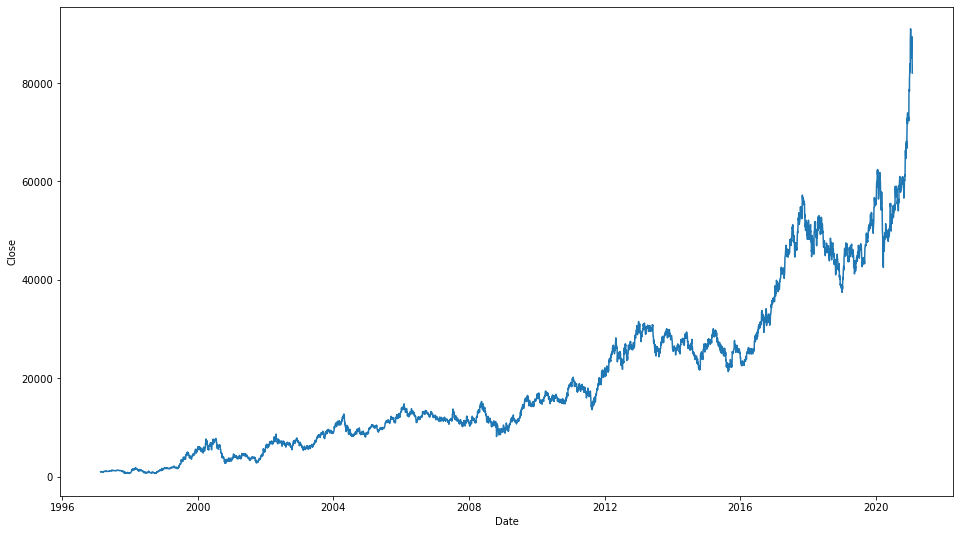

In [10]:
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)

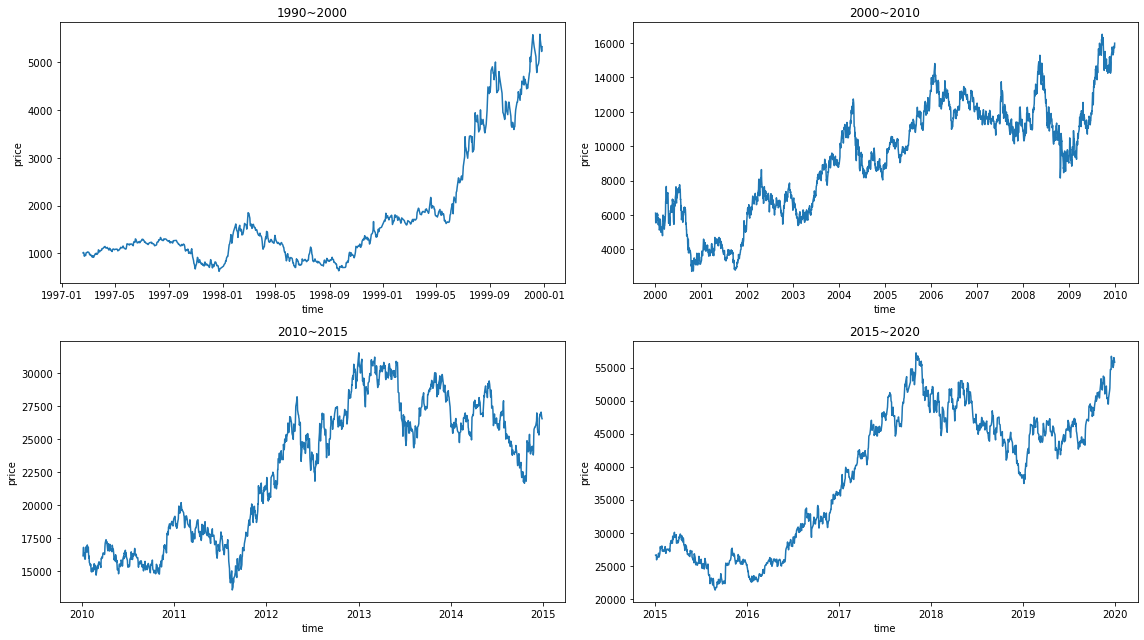

In [11]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0])&(stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.0110299 , 0.01061983, 0.01102793, 0.00426012, 0.00182634],
       [0.01121816, 0.01057851, 0.01121788, 0.00438184, 0.00115529],
       [0.01121816, 0.01065083, 0.01116201, 0.0042048 , 0.00098232],
       ...,
       [0.95902547, 0.90599174, 0.95642458, 0.94024764, 0.29259427],
       [0.9213732 , 0.88429752, 0.92960894, 0.91922366, 0.35279766],
       [0.93576966, 0.87809917, 0.91620112, 0.90041273, 0.40640232]])

In [14]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [17]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [18]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [19]:
x_train

,Open,High,Low,Volume
0,0.011030,0.010620,0.011028,0.001826
1,0.011218,0.010579,0.011218,0.001155
2,0.011218,0.010651,0.011162,0.000982
3,0.011030,0.010372,0.010425,0.001586
4,0.010332,0.010010,0.010235,0.001383
...,...,...,...,...
4795,0.270875,0.252893,0.265028,0.002394
4796,0.263123,0.247727,0.263017,0.002031
4797,0.267553,0.255372,0.268380,0.003140
4798,0.271318,0.258884,0.271732,0.002959


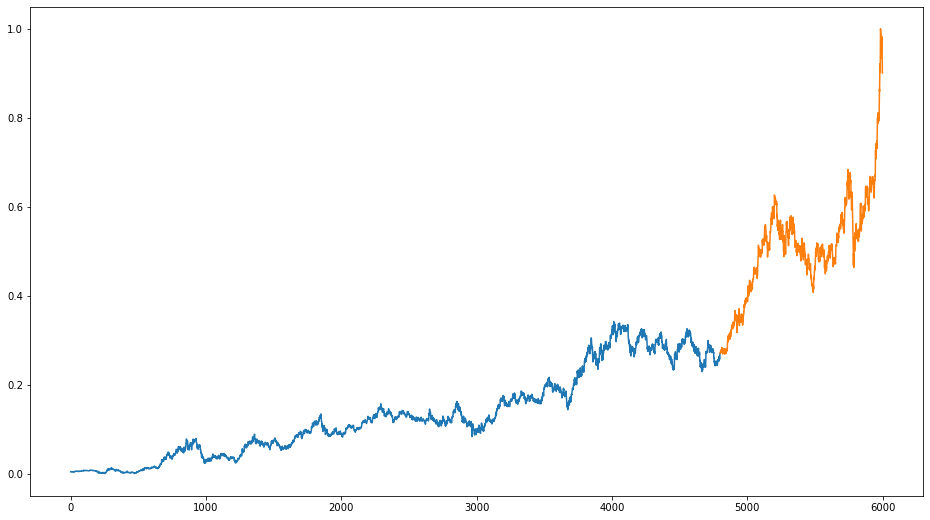

In [20]:
plt.figure(figsize=(16,9))
plt.plot(y_train)
plt.plot(y_test)

In [21]:
import tensorflow as tf

In [22]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [23]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [24]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber, MAPE, MSLE, binary_crossentropy
from tensorflow.keras.metrics import Accuracy, Mean, Precision
from tensorflow.keras.optimizers import Adam, RMSprop, Optimizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size=5,
          padding="causal",
          activation="relu",
          input_shape=[WINDOW_SIZE, 1]),
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [217]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [214]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

In [215]:
history = model.fit(train_data,
                   validation_data=(test_data),
                   epochs=50,
                   callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 5s 11ms/step - loss: 7.8117e-05 - acc: 8.4808e-04 - val_loss: 0.0022 - val_acc: 8.4746e-04

Epoch 00001: val_loss improved from inf to 0.00216, saving model to tmp\checkpointer.ckpt
Epoch 2/50
150/150 [==============================] - 1s 8ms/step - loss: 3.9238e-05 - acc: 2.1544e-04 - val_loss: 0.0014 - val_acc: 8.4746e-04

Epoch 00002: val_loss improved from 0.00216 to 0.00142, saving model to tmp\checkpointer.ckpt
Epoch 3/50
150/150 [==============================] - 1s 7ms/step - loss: 3.1279e-05 - acc: 9.5155e-04 - val_loss: 7.6344e-04 - val_acc: 8.4746e-04

Epoch 00003: val_loss improved from 0.00142 to 0.00076, saving model to tmp\checkpointer.ckpt
Epoch 4/50
150/150 [==============================] - 1s 7ms/step - loss: 2.9504e-05 - acc: 4.0409e-04 - val_loss: 0.0010 - val_acc: 8.4746e-04

Epoch 00004: val_loss did not improve from 0.00076
Epoch 5/50
150/150 [==============================] - 1s 8ms/step - loss: 2.7320e-05 -

KeyboardInterrupt: 

In [206]:
model.load_weights(filename)

In [207]:
pred = model.predict(test_data)

In [208]:
pred.shape

(1180, 1)

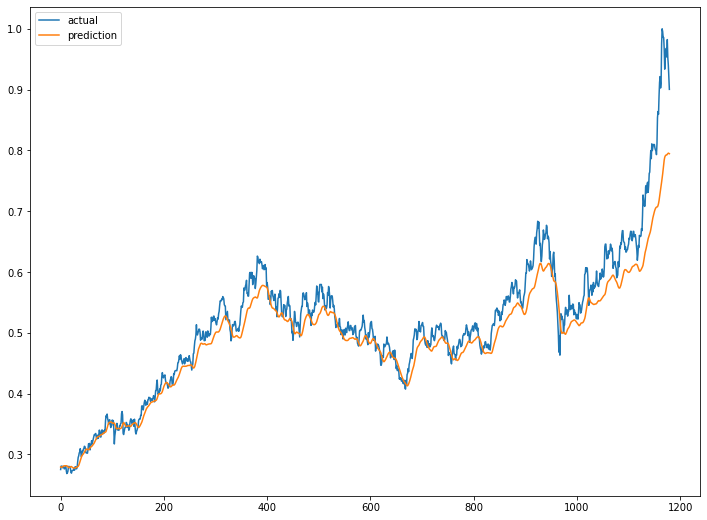

In [209]:
plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

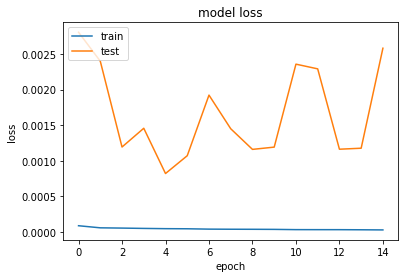

KeyError: 'acc'

In [210]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [211]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

plt.show()

KeyError: 'acc'

In [193]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

NameError: name 'history_dict' is not defined

<Figure size 432x288 with 0 Axes>